<a href="https://colab.research.google.com/github/jodekpotasu/classification42/blob/main/Projekt_praktyczny_2_poprawki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from google.colab import files
from bs4 import BeautifulSoup
import requests
import re
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import plotly 
import plotly.graph_objects as go 
from plotly.offline import iplot 
import plotly.express as px
import plotly.figure_factory as ff
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import xlwt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC


In [3]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/df1.csv'
trainingx = pd.read_csv(url)

In [5]:
trainingx

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0


In [4]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/attrition.csv'
trainingy = pd.read_csv(url)

In [6]:
trainingy

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No
...,...,...
4444,7975,Yes
4445,7976,Yes
4446,7977,Yes
4447,7978,Yes


In [7]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/df2.csv'
testx = pd.read_csv(url)

In [8]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/sample_output.csv'
testy = pd.read_csv(url)

In [176]:
data = trainingx.merge(trainingy)

In [69]:
data = data.drop(['EmployeeNumber','EmployeeCount','DailyRate',  'MonthlyRate'  ], axis=1)
data.describe(include='all')

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Attrition
count,4449.000000,4449,4449,4449.000000,4449.000000,4449,4449.000000,4449,4449.000000,4449.000000,4449.000000,4449,4449.000000,4449,4449.000000,4449.000000,4302
unique,NaN,3,3,NaN,NaN,6,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,2
top,NaN,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,Yes
freq,NaN,3147,2916,NaN,NaN,1823,NaN,2681,NaN,NaN,NaN,983,NaN,2074,NaN,NaN,2222
mean,416.187458,NaN,NaN,33339.433356,2.909867,NaN,2.719263,NaN,65.977073,2.739492,2.053495,NaN,2.724882,NaN,6468.496067,2.681726,NaN
std,1566.205147,NaN,NaN,145352.131423,1.025184,NaN,1.093263,NaN,20.277369,0.712660,1.102979,NaN,1.107453,NaN,4682.905422,2.487077,NaN
min,18.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,0.000000,NaN
25%,31.000000,NaN,NaN,2.000000,2.000000,NaN,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2899.000000,1.000000,NaN
50%,36.000000,NaN,NaN,8.000000,3.000000,NaN,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4876.000000,2.000000,NaN
75%,45.000000,NaN,NaN,17.000000,4.000000,NaN,4.000000,NaN,84.000000,3.000000,3.000000,NaN,4.000000,NaN,8346.000000,4.000000,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



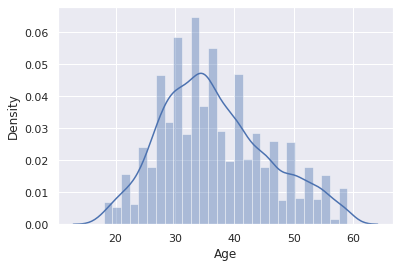

In [177]:
q = data['Age'].quantile(0.932)
data1 = data[data['Age']<q]
data1.describe(include = 'all')
sns.distplot(data1['Age'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



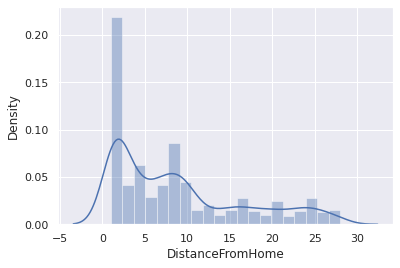

In [178]:
q = data1['DistanceFromHome'].quantile(0.93)
data2 = data1[data1['DistanceFromHome']<q]
data2.describe(include = 'all')
sns.distplot(data2['DistanceFromHome'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



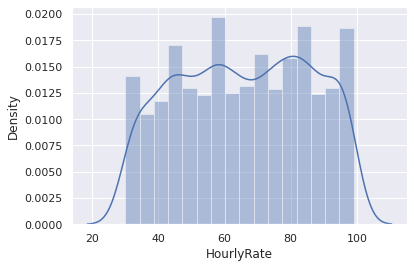

In [179]:
q = data2['HourlyRate'].quantile(0.9999)
data3 = data2[data2['HourlyRate' ]<q]
data3.describe(include = 'all')
sns.distplot(data3['HourlyRate' ])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



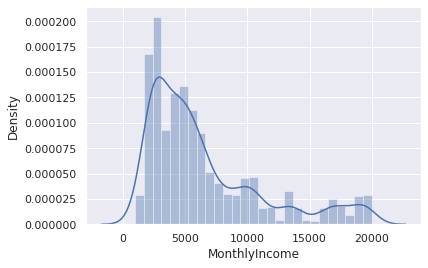

In [180]:
q = data3['MonthlyIncome'].quantile(0.9999)
data4 = data3[data3['MonthlyIncome']<q]
data4.describe(include = 'all')
sns.distplot(data4['MonthlyIncome'])

In [181]:
data4=data4.dropna()


In [182]:
data4

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Attrition
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,No
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,No
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,No
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,No
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,7969,41.0,Travel_Rarely,582.0,Research & Development,28.0,4.0,Life Sciences,1.0,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,5640.0,0.0,Yes
4439,7970,41.0,Travel_Rarely,582.0,Research & Development,28.0,4.0,Life Sciences,1.0,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,5640.0,0.0,Yes
4440,7971,42.0,Travel_Rarely,1396.0,Research & Development,6.0,3.0,Medical,1.0,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,14842.0,9.0,Yes
4441,7972,42.0,Travel_Rarely,1396.0,Research & Development,6.0,3.0,Medical,1.0,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,14842.0,9.0,Yes


In [183]:
data4.isnull().sum(axis = 0)

EmployeeNumber             0
Age                        0
BusinessTravel             0
DailyRate                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EnvironmentSatisfaction    0
Gender                     0
HourlyRate                 0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
MonthlyRate                0
NumCompaniesWorked         0
Attrition                  0
dtype: int64

In [184]:
YN_mapping = {"Yes": 1, "No": 0}

In [185]:
data4.iloc[:,-1] = data4.iloc[:,-1].map(YN_mapping)

In [186]:
forscaling = data4.loc[:,['Age','DistanceFromHome', 'HourlyRate', 'MonthlyIncome']]


In [187]:
nonscaled = data4.loc[:,['BusinessTravel','Department', 'Education', 'EducationField', 'Gender', 'JobInvolvement',  'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked']]


In [188]:
y = data4.iloc[:,-1]


In [189]:
scaler = StandardScaler()
scaler.fit(forscaling)
x = scaler.transform(forscaling)

In [190]:
datascaled = pd.concat([forscaling, nonscaled], axis=1)

In [191]:
for col in datascaled:
    print(data[col].unique())

[  30.   38.   26.   28.   35.   34.   32.   42.   40.   48.   39.   18.
   43.   21.   53.   45.   29.   33.   41.   24.   37.   50.   36.   52.
   47.   31.   49.   54.   44.   22.   46.   27.   55.   59.   25.   23.
   56.   20.   60.   51.   58.   19.   57. 8825. 3628. 6287. 9330. 1107.
 4454. 9155. 9890. 1189. 9195. 9014. 1136. 5582. 2404. 1541. 4510. 4322.
 4988. 8388. 2530. 8901. 2852. 2459. 2982. 4973. 8534. 8314. 4130. 4328.
 7952. 8699. 3147. 8889. 3871. 9531. 8167. 5257. 8136. 7390. 2993. 5672.
 5933. 5614. 5007. 3095. 9219. 6749. 4515. 6715. 1141. 8949. 3636. 4805.
 5959. 9384. 8042. 1423. 7056. 5116. 2667. 8703. 1126. 9612. 7845. 6998.
 1788. 6727. 5377. 5565. 4558. 6506. 4591. 7662. 6510. 4985. 9581. 2095.
 2275. 6399. 4935. 2698. 7617. 9661. 4834. 2242. 1915. 3226. 7924. 9529.
 8326. 1578. 8560. 9078. 6429. 9243. 2186. 2888. 6210. 3388. 2423. 6025.
 1530. 7017. 4137. 5852. 4744. 7147. 7963. 2972. 5997. 3626. 8744. 2637.
 4880. 4330. 2641. 2882. 5215. 7015. 8365. 6032. 50

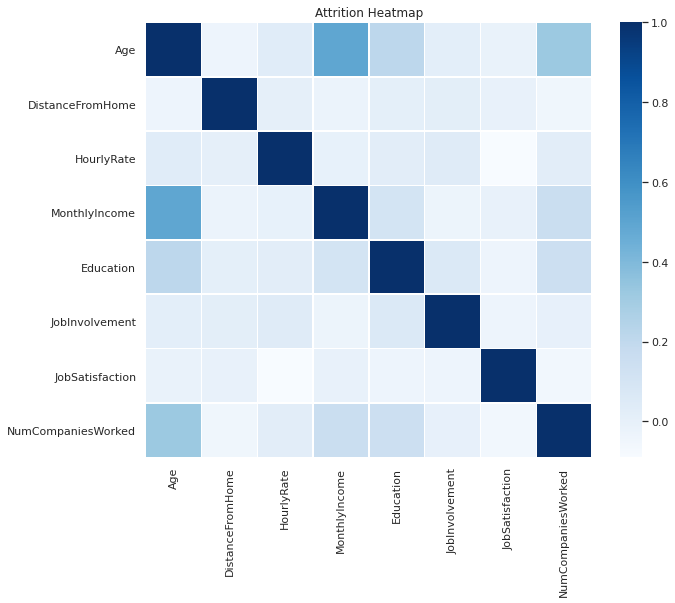

In [192]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = datascaled.corr()
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [193]:
datascaled = pd.get_dummies (datascaled)

In [194]:
datascaled


,Age,DistanceFromHome,HourlyRate,MonthlyIncome,Education,JobInvolvement,JobSatisfaction,NumCompaniesWorked,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,30.0,1.0,55.0,5126.0,1.0,2.0,4.0,1.0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,38.0,2.0,54.0,7756.0,2.0,2.0,3.0,3.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,26.0,6.0,46.0,2368.0,3.0,2.0,2.0,1.0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,28.0,8.0,66.0,3310.0,2.0,3.0,4.0,1.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,35.0,4.0,75.0,1951.0,2.0,3.0,4.0,1.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,41.0,28.0,60.0,13570.0,4.0,2.0,2.0,0.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4439,41.0,28.0,60.0,13570.0,4.0,2.0,2.0,0.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4440,42.0,6.0,83.0,13348.0,3.0,3.0,1.0,9.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4441,42.0,6.0,83.0,13348.0,3.0,3.0,1.0,9.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


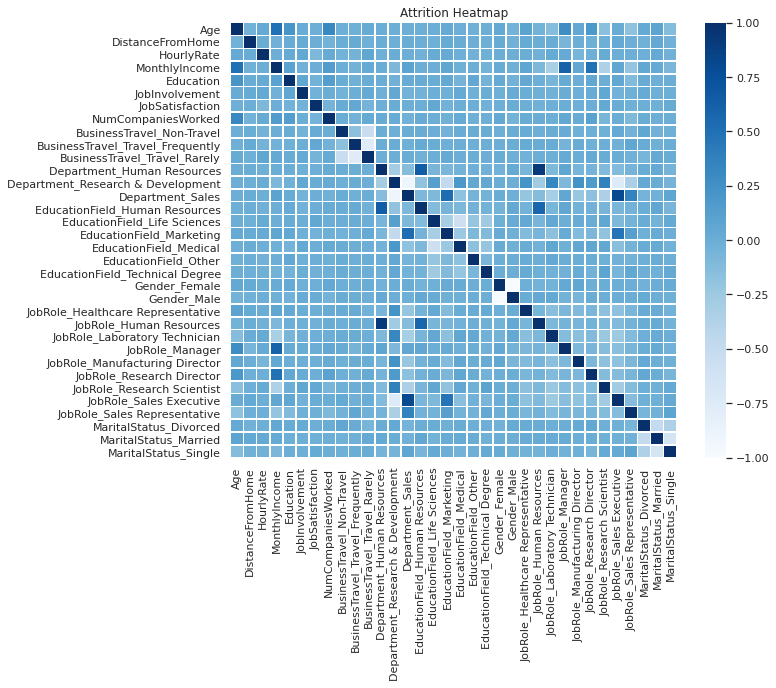

In [195]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = datascaled.corr()
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [196]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4438    1
4439    1
4440    1
4441    1
4442    0
Name: Attrition, Length: 3596, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



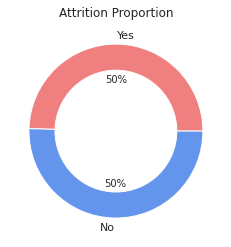

In [197]:
Y_count = len(data4[data4['Attrition'] == 1])
N_count = len(data4[data4['Attrition'] == 0])
# create data
names='Yes', 'No',
size=[Y_count,N_count]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['lightcoral','cornflowerblue'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show()

In [198]:
cleaneddata=datascaled

In [199]:
x = datascaled

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [202]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(x, y):
  X_train_kfold, y_train_kfold = x.iloc[train], y.iloc[train]
  X_test_kfold, y_test_kfold = x.iloc[test], y.iloc[test]

SVC
              precision    recall  f1-score   support

           0       0.51      0.73      0.60       363
           1       0.50      0.28      0.36       357

    accuracy                           0.51       720
   macro avg       0.50      0.50      0.48       720
weighted avg       0.50      0.51      0.48       720



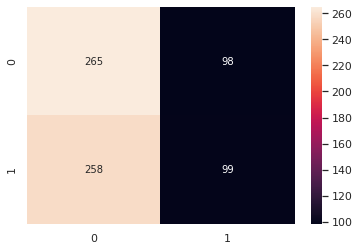

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       363
           1       0.47      0.46      0.46       357

    accuracy                           0.47       720
   macro avg       0.47      0.47      0.47       720
weighted avg       0.47      0.47      0.47       720



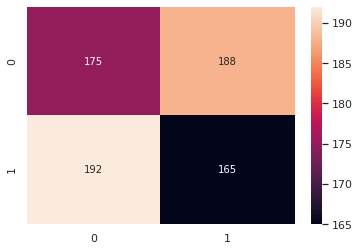

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.46      0.56      0.50       363
           1       0.42      0.33      0.37       357

    accuracy                           0.44       720
   macro avg       0.44      0.44      0.44       720
weighted avg       0.44      0.44      0.44       720



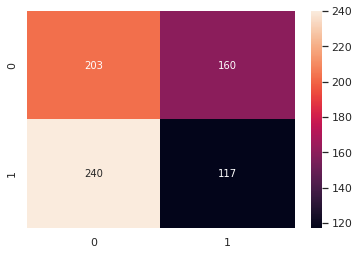

In [201]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
classifiers = [SVC, KNeighborsClassifier, DecisionTreeClassifier]
for classifier_class in classifiers:
    model = classifier_class()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

SVC
              precision    recall  f1-score   support

           0       0.53      0.74      0.62       362
           1       0.57      0.34      0.42       357

    accuracy                           0.54       719
   macro avg       0.55      0.54      0.52       719
weighted avg       0.55      0.54      0.52       719



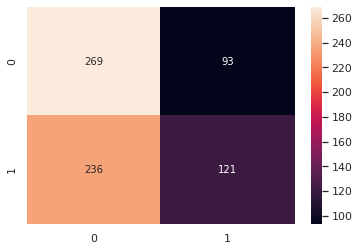

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.47      0.50      0.48       362
           1       0.45      0.42      0.44       357

    accuracy                           0.46       719
   macro avg       0.46      0.46      0.46       719
weighted avg       0.46      0.46      0.46       719



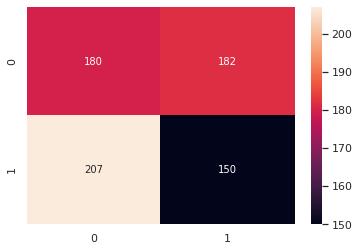

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.46      0.53      0.49       362
           1       0.44      0.37      0.40       357

    accuracy                           0.45       719
   macro avg       0.45      0.45      0.45       719
weighted avg       0.45      0.45      0.45       719



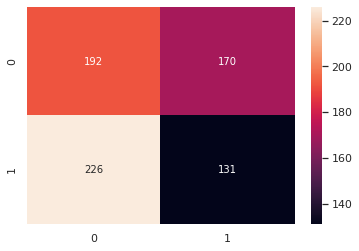

In [203]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
classifiers = [SVC, KNeighborsClassifier, DecisionTreeClassifier]
for classifier_class in classifiers:
    model = classifier_class()
    model.fit(X_train_kfold, y_train_kfold)
    y_pred_kfold = model.predict(X_test_kfold)
    print(model.__class__.__name__)
    print(classification_report(y_test_kfold, y_pred_kfold))
    cm = confusion_matrix(y_test_kfold, y_pred_kfold)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

KNN


In [131]:
from sklearn.neighbors import KNeighborsClassifier
# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Predict on the test features, print the results
pred = knn.predict(X_test)

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy
def calculate_metrics(target, prediction, average='micro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total
def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [133]:
print_results(calculate_metrics(y_test, pred), 'kNN')

Results for kNN
----
  Accuracy:  0.4666666666666667
  Precision: 0.4666666666666667
  Recall:    0.4666666666666667
  F1 score:  0.4666666666666667
  Mislabeled 384 out of 720




In [134]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.47      0.49      0.48       363
           1       0.46      0.44      0.45       357

    accuracy                           0.47       720
   macro avg       0.47      0.47      0.47       720
weighted avg       0.47      0.47      0.47       720



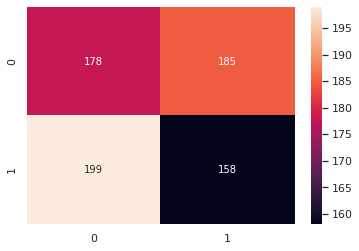

In [135]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred))

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
params_knn = {
    'n_neighbors': [2, 3, 5, 7, 10, 15],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}
clf  = GridSearchCV(KNeighborsClassifier(), params_knn)
clf.fit(X_train_kfold, y_train_kfold)
clf.best_params_

{'algorithm': 'auto', 'metric': 'chebyshev', 'n_neighbors': 15}

In [160]:
knn = KNeighborsClassifier(algorithm= 'auto', metric= 'chebyshev', n_neighbors= 15)

In [161]:
knn.fit(X_train_kfold, y_train_kfold)
y_pred_kfold = knn.predict(X_test_kfold)

In [162]:
print_results(calculate_metrics(y_test_kfold, y_pred_kfold), 'kNN for KFold')

Results for kNN for KFold
----
  Accuracy:  0.502086230876217
  Precision: 0.502086230876217
  Recall:    0.502086230876217
  F1 score:  0.502086230876217
  Mislabeled 358 out of 719




In [ ]:
# y_pred = knn.predict()
# y_pred.to_csv(index=False)

In [ ]:
# y_pred_kfold_csv = pd.DataFrame(data=y_pred_kfold)
# y_pred_kfold_csv('y_pred.csv', index = False)
# from google.colab import files
# files.download('y_pred.csv')

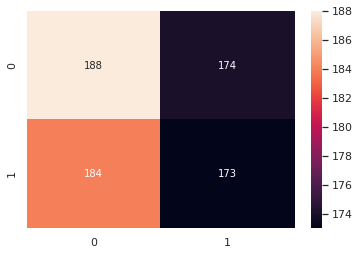

In [163]:
cm = confusion_matrix(y_test_kfold, y_pred_kfold)
sns.heatmap(cm, annot=True, fmt='d')

SVC

In [164]:
model = SVC(C=0.01, class_weight=None, kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       363
           1       0.00      0.00      0.00       357

    accuracy                           0.50       720
   macro avg       0.25      0.50      0.34       720
weighted avg       0.25      0.50      0.34       720



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



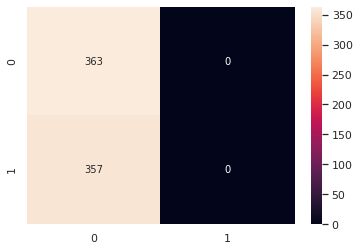

In [166]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [167]:
model.fit(X_train_kfold, y_train_kfold)
y_pred = model.predict(X_test_kfold)

In [168]:
print(classification_report(y_test_kfold, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       362
           1       0.00      0.00      0.00       357

    accuracy                           0.50       719
   macro avg       0.25      0.50      0.33       719
weighted avg       0.25      0.50      0.34       719



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



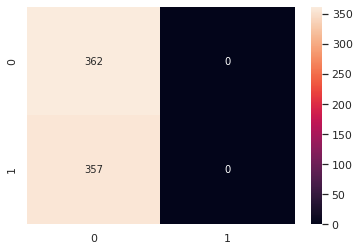

In [169]:
cm = confusion_matrix(y_test_kfold, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

drzewo

In [170]:
from sklearn.tree import plot_tree

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [172]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [173]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [174]:
plt.figure(dpi=300)
plot_tree(clf)
plt.show()

KeyboardInterrupt: ignored

In [175]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

ValueError: ignored

In [156]:
clf = DecisionTreeClassifier()
clf.fit(X_train_kfold, y_train_kfold)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_dt = clf.predict(X_test)

Results for Decision Tree train
----
  Accuracy:  1.0
  Precision: 1.0
  Recall:    1.0
  F1 score:  1.0
  Mislabeled 0 out of 1362




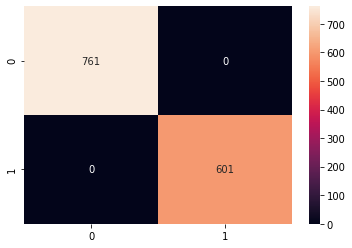

In [ ]:
y_dt_train =  clf.predict(X_train)
print_results(calculate_metrics(y_train.values, y_dt_train), 'Decision Tree train')
cm = confusion_matrix(y_train, y_dt_train)
sns.heatmap(cm, annot=True, fmt='d')


In [ ]:
def plot_confusion_matrix(confusion_matrix, classes, title=None,
                          title_appendix='',
                          cmap=plt.cm.Blues):
    # tytuł wykresu
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    fig, ax = plt.subplots()
    # rysuje CM
    img = ax.imshow(confusion_matrix, cmap=cmap)
    # dodaje pasek z boku
    ax.figure.colorbar(img, ax=ax)
    # dodatki do wykresu
    ax.set_xticks(np.arange(confusion_matrix.shape[1]))
    ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_yticks(np.arange(confusion_matrix.shape[0]))
    ax.set_yticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    # etykiety
    fmt = '.2f' if confusion_matrix.dtype == 'float' else 'd'
    thresh = confusion_matrix.max() / 2
    for y, row in enumerate(confusion_matrix):
        for x, cell in enumerate(row):
            ax.text(x, y, format(cell, fmt),
                    ha='center', va='center',
                    color='white' if cell > thresh else 'black')
    fig.tight_layout()
    return ax

In [ ]:
#print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree test')
#cm = confusion_matrix(y_test, y_dt)
#plot_confusion_matrix(cm, y)

In [ ]:
#classes = cleaneddata.pop(y).unique()

Results for Decision Tree test
----
  Accuracy:  1.0
  Precision: 1.0
  Recall:    1.0
  F1 score:  1.0
  Mislabeled 0 out of 341




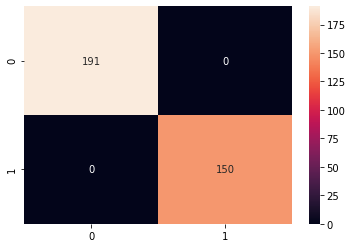

In [ ]:
print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree test')
cm = confusion_matrix(y_test, y_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

100.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       191
         Yes       1.00      1.00      1.00       150

    accuracy                           1.00       341
   macro avg       1.00      1.00      1.00       341
weighted avg       1.00      1.00      1.00       341



In [ ]:
print(X_train)

             0         1        2  ...        17        18  EmployeeNumber
909  -0.458919  1.046640 -0.41773  ...  1.067212 -0.998877              52
3603 -0.047772 -0.051527 -0.41773  ...  1.067212 -0.998877            7134
3274 -0.066872 -0.600610 -0.41773  ...  1.067212 -0.998877            6805
238  -0.442489  0.497557 -0.41773  ...  1.067212 -0.998877             335
802  -0.412184 -0.326069 -0.41773  ...  1.067212 -0.998877             857
...        ...       ...      ...  ...       ...       ...             ...
1237 -0.381008 -0.051527 -0.41773  ...  1.067212 -0.998877            1394
3605 -0.047656  0.497557 -0.41773  ...  1.067212 -0.998877            7136
277  -0.447714 -0.875152 -0.41773  ...  1.067212 -0.998877             245
797  -0.455784 -0.326069 -0.41773  ...  1.067212 -0.998877             106
4130 -0.017177 -0.600610 -0.41773  ... -0.937021  1.001124            7661

[1362 rows x 20 columns]


In [ ]:
y_pred.to_csv("y_pred.csv", index=False)

AttributeError: ignored

random forest

In [204]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_kfold, y_train_kfold)
y_pred = model.predict(X_test_kfold)
print(classification_report(y_test_kfold, y_pred_kfold))

              precision    recall  f1-score   support

           0       0.46      0.53      0.49       362
           1       0.44      0.37      0.40       357

    accuracy                           0.45       719
   macro avg       0.45      0.45      0.45       719
weighted avg       0.45      0.45      0.45       719

